In [1]:
# Librerias
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import time
import locale
%matplotlib inline
import seaborn as sns
import matplotlib
import cvxopt as opt
from cvxopt import blas, solvers
import math
np.random.seed(123)


# Turn off progress printing 
solvers.options['show_progress'] = False

___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />

# Proyecto de Aplicación Profesional

## Optimización De Programas de Inversión para Intermediarios Financieros



### Integrantes:

### - Jazmín Calderón
### - Diana Chávez
### - Juan Antonio Flores




In [2]:
lista = ['https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-SP-500-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-SP-Mid-Cap-ETF_fund.csv', 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-SP-Total-US-Stock-Market-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Expanded-Tech-Sector-ETF_fund.csv', #nuevo 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Expanded-Tech-Software-Sector-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-ACWI-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-EAFE-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-Emerging-Markets-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-Japan-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-USA-ESG-Select-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Nasdaq-Biotechnology-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-North-American-Tech-Multimedia-Networking-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-PHLX-Semiconductor-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Preferred-and-Income-Securities-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-1000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-1000-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-1000-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-2000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-SP-500-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-SP-500-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Basic-Materials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Consumer-Services-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Energy-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Financial-Services-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Financials-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Healthcare-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Home-Construction-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Industrials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Medical-Devices-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Pharmaceuticals-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Technology-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Telecommunications-ETF_fund.csv']

In [3]:
len(lista)

32

In [4]:
listas = ['https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-SP-500-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-SP-Mid-Cap-ETF_fund.csv', 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-SP-Total-US-Stock-Market-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Expanded-Tech-Sector-ETF_fund.csv', #nuevo 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Expanded-Tech-Software-Sector-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-ACWI-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-EAFE-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-Emerging-Markets-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-Japan-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-USA-ESG-Select-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Nasdaq-Biotechnology-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-North-American-Tech-Multimedia-Networking-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-PHLX-Semiconductor-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Preferred-and-Income-Securities-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-1000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-1000-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-1000-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-2000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-SP-500-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-SP-500-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Basic-Materials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Consumer-Services-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Energy-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Financial-Services-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Financials-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Healthcare-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Home-Construction-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Industrials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Medical-Devices-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Pharmaceuticals-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Technology-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Telecommunications-ETF_fund.csv']

In [5]:
lista_M = ['https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Core-SP-500-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Core-SP-Mid-Cap-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Core-SP-Total-US-Stock-Market-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Expanded-Tech-Sector-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Expanded-Tech-Software-Sector-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-MSCI-ACWI-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-MSCI-EAFE-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-MSCI-Emerging-Markets-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-MSCI-Japan-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-MSCI-USA-ESG-Select-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Nasdaq-Biotechnology-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-North-American-Tech-Multimedia-Networking-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-PHLX-Semiconductor-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Preferred-and-Income-Securities-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Russell-1000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Russell-1000-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Russell-1000-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Russell-2000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-SP-500-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-SP-500-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Basic-Materials-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Consumer-Services-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Energy-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Financial-Services-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Financials-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Healthcare-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Home-Construction-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Industrials-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Medical-Devices-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Pharmaceuticals-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Technology-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Telecommunications-ETF_fund.csv']
         

## Críterio #1 Portafolio de Markowitz (ponlo donde vaya hahaha)

In [6]:
def rend (i):
    fecha=[]

    ETF = pd.read_csv(lista_M[i], skiprows = [0,1,2,3])
  
    ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].replace('--',"0")
    ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].astype(float)
    ETF=ETF['Monthly Total (NAV) Return']

    return(ETF)

In [7]:
ren=[]
for i in range(32):
    ren.append(1+i)

In [8]:
r0= rend(0)
r1= rend(1)
r2= rend(2)
r3= rend(3)
r4= rend(4)
r5= rend(5)
r6= rend(6)
r7= rend(7)
r8= rend(8)
r9= rend(9)
r10= rend(10)
r11= rend(11)
r12= rend(12)
r13= rend(13)
r14= rend(14)
r15= rend(15)
r16= rend(16)
r17= rend(17)
r18= rend(18)
r19= rend(19)
r20= rend(20)
r21= rend(21)
r22= rend(22)
r23= rend(23)
r24= rend(24)
r25= rend(25)
r26= rend(26)
r27= rend(27)
r28= rend(28)
r29= rend(29)
r30= rend(30)
r31= rend(31)

In [9]:
df_rend = pd.DataFrame({'Core SP 500': r0,'Core SP Mid Cap': r1,
                  'Core SP Total US Stock Market': r2,'Expanded Tech Sector': r3,
                  'Expanded Tech Software Sector': r4,'MSCI ACWI': r5,
                  'MSCI EAFE': r6,'MSCI Emerging Markets': r7, 'MSCI Japan': r8,
                  'MSCI USA ESG Select': r9, 'Nasdaq Biotechnology': r10, 'NorthAmerican Tech Multimedia Networking': r11,
                  'PHLX Semiconductor': r12, 'Preferred and Income Securities': r13, 'Russell 1000': r14,
                  'Russell 1000 Growth': r15,'Russell 1000 Value': r16, 'Russell 2000': r17,
                  'SP 500 Growth': r18,'US Basic Materials': r19,
                  'US Consumer Services': r20, 'SP 500 Value': r21, 'US Energy': r22,
                  'US Financial Services': r23, 'US Financials': r24, 'US Healthcare': r25, 'Home Construction': r26,
                  'US Industrials': r27, 'US Medical Devices': r28, 'US Pharmaceuticals': r29,
                  'US Technology': r30,'US Telecommunications': r31},index=ren)

df_rend = df_rend[0:11]
pd.set_option('display.max_columns', 32)


In [10]:


# get adjusted closing prices of 5 selected companies with Quandl
#quandl.ApiConfig.api_key = 'INSERT YOUR API KEY HERE'
selected = ['Core SP 500','Core SP Mid Cap',
                  'Core SP Total US Stock Market','Expanded Tech Sector',
                  'Expanded Tech Software Sector','MSCI ACWI',
                  'MSCI EAFE','MSCI Emerging Markets', 'MSCI Japan',
                  'MSCI USA ESG Select', 'Nasdaq Biotechnology', 'NorthAmerican Tech Multimedia Networking',
                  'PHLX Semiconductor', 'Preferred and Income Securities', 'Russell 1000',
                  'Russell 1000 Growth','Russell 1000 Value', 'Russell 2000',
                  'SP 500 Growth','US Basic Materials','US Consumer Services', 'SP 500 Value', 'US Energy',
                  'US Financial Services', 'US Financials', 'US Healthcare', 'Home Construction',
                  'US Industrials', 'US Medical Devices', 'US Pharmaceuticals','US Technology','US Telecommunications']

In [11]:
# calculate daily and annual returns of the stocks
returns_daily = df_rend
returns_annual = returns_daily.mean() * 12

# get daily and covariance of returns of the stock
cov_daily = df_rend.cov()
cov_annual = cov_daily * 12

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = (returns- 2.39)/ volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock for stock in selected]

# reorder dataframe columns
df = df[column_order]


# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]



In [12]:
pond_v = pd.DataFrame(min_variance_port.T)

In [13]:
pv=[0.027815,0.022344,0.064484,0.003748,0.018357,0.013804,0.067573,0.006851,0.019555,0.038672,0.067051,0.046425,
    0.012601,0.001928,0.034970,0.001826,0.046842,0.050358,0.033331,0.001242,0.038803,0.038112,0.002219,0.024148,
    0.068672,0.005738,0.046131,0.027246,0.036965,0.069215,0.032499,0.030476]

In [14]:
pond_s = pd.DataFrame(sharpe_portfolio.T)


In [15]:
ps=[0.013933,0.047979,0.033390,0.042643,0.072411,0.003220,0.017133,0.049593,0.016593,0.030975,0.007098,0.043459,
   0.006785,0.005140,0.034365,0.033948,0.002603,0.002349,0.060880,0.064910,0.062777,0.012096,0.033776,0.072945,
   0.001533,0.009174,0.016492,0.020435,0.002385,0.069713,0.065061,0.044208]

## Importar datos de ETF'S

In [16]:
tw=1
n_etfs=len(lista)
equal_w = tw/n_etfs #Equal Weighted


In [17]:
equal_we=np.array([0.03125,  0.03125,  0.03125,  0.03125,  0.03125,  0.03125,
             0.03125,  0.03125,  0.03125,  0.03125,  0.03125,  0.03125,
             0.03125,  0.03125,  0.03125,  0.03125,  0.03125,  0.03125,
             0.03125,  0.03125,  0.03125,  0.03125,  0.03125,  0.03125,
             0.03125,  0.03125,  0.03125,  0.03125,  0.03125,  0.03125,
             0.03125,  0.03125])

## Equal weight 

In [18]:
def ETF_date(j):
    fecha=[]

    ETF = pd.read_csv(lista[j], skiprows = [0,1,2,3])
    for i in range(len(ETF["Month End Date"])): #for para numero de fechas dentro de un archivo
        fecha.append(ETF["Month End Date"].iloc[i].replace("-"," "))
        ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].replace('--',"0")
        ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].astype(float)

    tabla=pd.DataFrame(columns=['Month End Date','Monthly Total (NAV) Return'])
    #tabla.index.name = "ETF"
    tabla['Month End Date'] = fecha
    x=ETF['Monthly Total (NAV) Return']
    tabla['Monthly Total (NAV) Return']=x
    tabla['Month End Date'] = pd.to_datetime(tabla['Month End Date'], format='%b %d, %Y')
    grupo = tabla.groupby(tabla['Month End Date'].dt.year)['Monthly Total (NAV) Return'].agg(["mean"]).unstack()

    return(grupo)

In [19]:
#DATAFRAME DE RENDIMIENTOS POR AÑO DE CADA ETF

m0 = ETF_date(0)['mean']
m1 = ETF_date(1)['mean']
m2 = ETF_date(2)['mean']
m3 = ETF_date(3)['mean']
m4 = ETF_date(4)['mean']
m5 = ETF_date(5)['mean']
m6 = ETF_date(6)['mean']
m7 = ETF_date(7)['mean']
m8 = ETF_date(8)['mean']
m9 = ETF_date(9)['mean']
m10 = ETF_date(10)['mean']
m11 = ETF_date(11)['mean']
m12 = ETF_date(12)['mean']
m13 = ETF_date(13)['mean']
m14 = ETF_date(14)['mean']
m15 = ETF_date(15)['mean']
m16 = ETF_date(16)['mean']
m17 = ETF_date(17)['mean']
m18 = ETF_date(18)['mean']
m19 = ETF_date(19)['mean']
m20 = ETF_date(20)['mean']
m21 = ETF_date(21)['mean']
m22 = ETF_date(22)['mean']
m23 = ETF_date(23)['mean']
m24 = ETF_date(24)['mean']
m25 = ETF_date(25)['mean']
m26 = ETF_date(26)['mean']
m27 = ETF_date(27)['mean']
m28 = ETF_date(28)['mean']
m29 = ETF_date(29)['mean']
m30 = ETF_date(30)['mean']
m31 = ETF_date(31)['mean']

In [20]:
a = pd.DataFrame({'Core SP 500': m0,'Core SP Mid Cap': m1,
                  'Core SP Total US Stock Market': m2,'Expanded Tech Sector': m3,
                  'Expanded Tech Software Sector': m4,'MSCI ACWI': m5,
                  'MSCI EAFE': m6,'MSCI Emerging Markets': m7, 'MSCI Japan': m8,
                  'MSCI USA ESG Select': m9, 'Nasdaq Biotechnology': m10, 'NorthAmerican Tech Multimedia Networking': m11,
                  'PHLX Semiconductor': m12, 'Preferred and Income Securities': m13, 'Russell 1000': m14,
                  'Russell 1000 Growth': m15,'Russell 1000 Value': m16, 'Russell 2000': m17,
                  'SP 500 Growth': m18,'US Basic Materials': m19,
                  'US Consumer Services': m20, 'SP 500 Value': m21, 'US Energy': m22,
                  'US Financial Services': m23, 'US Financials': m24, 'US Healthcare': m25, 'Home Construction': m26,
                  'US Industrials': m27, 'US Medical Devices': m28, 'US Pharmaceuticals': m29,
                  'US Technology': m30,'US Telecommunications': m31})

a = a[12:24]
pd.set_option('display.max_columns', 32)


In [21]:
part1=a*equal_w

In [22]:
rend_port=[]
for i in range(len(part1)):
    suma=np.cumsum(part1.iloc[i])
    rend_port.append(suma.iloc[31])


In [23]:
years_m= []
for i in range(2007,2019):
    years_m.append(1+i)
    

In [24]:
part2=pv*a
rend_port2=[]
for i in range(len(part2)):
    suma=np.cumsum(part2.iloc[i])
    rend_port2.append(suma.iloc[31])

In [25]:
part3=ps*a
rend_port3=[]
for i in range(len(part3)):
    suma=np.cumsum(part3.iloc[i])
    rend_port3.append(suma.iloc[31])

# riesgo

In [26]:
def rend_vol19 (i):
    ETF = pd.read_csv(lista[i], skiprows = [0,1,2,3])

    ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].replace('--',"0")
    ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].astype(float)
    ETF=ETF['Monthly Total (NAV) Return']
    #ETF.iloc[4:44]
    last=len(ETF)
    ETF=ETF.iloc[(last-2):last]
    #ETF=np.mean(ETF)
    ETF.index=[1,2]
    return(ETF)

In [27]:
def rend_vol18 (i):
    ETF = pd.read_csv(lista[i], skiprows = [0,1,2,3])

    ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].replace('--',"0")
    ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].astype(float)
    ETF=ETF['Monthly Total (NAV) Return']
    #ETF.iloc[4:44]
    last=len(ETF)
    ETF18=ETF.iloc[(last-14):(last-2)]
    ETF17=ETF.iloc[(last-26):(last-14)]
    ETF16=ETF.iloc[(last-38):(last-26)]
    ETF15=ETF.iloc[(last-50):(last-38)]
    ETF14=ETF.iloc[(last-62):(last-50)]
    ETF13=ETF.iloc[(last-74):(last-62)]
    ETF12=ETF.iloc[(last-86):(last-74)]
    ETF11=ETF.iloc[(last-98):(last-86)]
    ETF10=ETF.iloc[(last-110):(last-98)]
    ETF9=ETF.iloc[(last-122):(last-110)]
    #ETF=np.mean(ETF)
    index=[1,2,3,4,5,6,7,8,9,10,11,12]
    
    ETF18.index=index
    ETF17.index=index
    ETF16.index=index
    ETF15.index=index
    ETF14.index=index
    ETF13.index=index
    ETF12.index=index
    ETF11.index=index
    ETF10.index=index
    ETF9.index=index
    
    return(ETF18,ETF17,ETF16,ETF15,ETF14,ETF13,ETF12,ETF11,ETF10,ETF9)

In [28]:
re18=[]
re17=[]
re16=[]
re15=[]
re14=[]
re13=[]
re12=[]
re11=[]
re10=[]
re9=[]
for i in range(32):
    y=rend_vol18(i)
    re18.append(y[0])
    re17.append(y[1])
    re16.append(y[2])
    re15.append(y[3])
    re14.append(y[4])
    re13.append(y[5])
    re12.append(y[6])
    re11.append(y[7])
    re10.append(y[8])
    re9.append(y[9])

In [29]:
r=[]
for i in range(32):
    r.append(rend_vol19(i))

In [30]:
r19 = pd.DataFrame({'Core SP 500': r[0],'Core SP Mid Cap':  r[1],
                  'Core SP Total US Stock Market':  r[2],'Expanded Tech Sector':  r[3],
                  'Expanded Tech Software Sector':  r[4],'MSCI ACWI':  r[5],
                  'MSCI EAFE':  r[6],'MSCI Emerging Markets':  r[7], 'MSCI Japan':  r[8],
                  'MSCI USA ESG Select':  r[9], 'Nasdaq Biotechnology':  r[10], 'NorthAmerican Tech Multimedia Networking': r[11],
                  'PHLX Semiconductor':  r[12], 'Preferred and Income Securities': r[13], 'Russell 1000':  r[14],
                  'Russell 1000 Growth':  r[15],'Russell 1000 Value':  r[16], 'Russell 2000':  r[17],
                  'SP 500 Growth':  r[18],'US Basic Materials':  r[19],
                  'US Consumer Services':  r[20], 'SP 500 Value':  r[21], 'US Energy':  r[22],
                  'US Financial Services': r[23], 'US Financials': r[24], 'US Healthcare':  r[25], 'Home Construction': r[26],
                  'US Industrials': r[27], 'US Medical Devices': r[28], 'US Pharmaceuticals': r[29],
                  'US Technology': r[30],'US Telecommunications': r[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)

In [31]:
# calculate daily and annual returns of the stocks
def ports_vol(r19,equal_we):
    returns_daily = r19
    returns_annual = returns_daily.mean() * 12

    # get daily and covariance of returns of the stock
    cov_daily = r19.cov()
    cov_annual = cov_daily * 12
    #port_volatility = []

    #set random seed for reproduction's sake
    np.random.seed(101)

    # populate the empty lists with each portfolios returns,risk and weights

    returns = np.dot(equal_we, returns_annual)
    volatility = np.sqrt(np.dot(equal_we.T, np.dot(cov_annual,equal_we)))
    #port_volatility.append(volatility)
    return(volatility)

In [32]:
r18 = pd.DataFrame({'Core SP 500': re18[0],'Core SP Mid Cap':  re18[1],
                  'Core SP Total US Stock Market':  re18[2],'Expanded Tech Sector':  re18[3],
                  'Expanded Tech Software Sector':  re18[4],'MSCI ACWI':  re18[5],
                  'MSCI EAFE':  re18[6],'MSCI Emerging Markets':  re18[7], 'MSCI Japan':  re18[8],
                  'MSCI USA ESG Select':  re18[9], 'Nasdaq Biotechnology':  re18[10], 'NorthAmerican Tech Multimedia Networking': re18[11],
                  'PHLX Semiconductor':  re18[12], 'Preferred and Income Securities': re18[13], 'Russell 1000':  re18[14],
                  'Russell 1000 Growth':  re18[15],'Russell 1000 Value':  re18[16], 'Russell 2000':  re18[17],
                  'SP 500 Growth':  re18[18],'US Basic Materials':  re18[19],
                  'US Consumer Services':  re18[20], 'SP 500 Value':  re18[21], 'US Energy':  re18[22],
                  'US Financial Services': re18[23], 'US Financials': re18[24], 'US Healthcare':  re18[25], 'Home Construction': re18[26],
                  'US Industrials': re18[27], 'US Medical Devices': re18[28], 'US Pharmaceuticals': re18[29],
                  'US Technology': re18[30],'US Telecommunications': re18[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)

In [33]:
r17 = pd.DataFrame({'Core SP 500': re17[0],'Core SP Mid Cap':  re17[1],
                  'Core SP Total US Stock Market':  re17[2],'Expanded Tech Sector':  re17[3],
                  'Expanded Tech Software Sector':  re17[4],'MSCI ACWI':  re17[5],
                  'MSCI EAFE':  re17[6],'MSCI Emerging Markets':  re17[7], 'MSCI Japan':  re17[8],
                  'MSCI USA ESG Select':  re17[9], 'Nasdaq Biotechnology':  re17[10], 'NorthAmerican Tech Multimedia Networking': re17[11],
                  'PHLX Semiconductor':  re17[12], 'Preferred and Income Securities': re17[13], 'Russell 1000':  re17[14],
                  'Russell 1000 Growth':  re17[15],'Russell 1000 Value':  re17[16], 'Russell 2000':  re17[17],
                  'SP 500 Growth':  re17[18],'US Basic Materials':  re17[19],
                  'US Consumer Services':  re17[20], 'SP 500 Value':  re17[21], 'US Energy':  re17[22],
                  'US Financial Services': re17[23], 'US Financials': re17[24], 'US Healthcare':  re17[25], 'Home Construction': re17[26],
                  'US Industrials': re17[27], 'US Medical Devices': re17[28], 'US Pharmaceuticals': re17[29],
                  'US Technology': re17[30],'US Telecommunications': re17[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)


In [34]:
r16 = pd.DataFrame({'Core SP 500': re16[0],'Core SP Mid Cap':  re16[1],
                  'Core SP Total US Stock Market':  re16[2],'Expanded Tech Sector':  re16[3],
                  'Expanded Tech Software Sector':  re16[4],'MSCI ACWI':  re16[5],
                  'MSCI EAFE':  re16[6],'MSCI Emerging Markets':  re16[7], 'MSCI Japan':  re16[8],
                  'MSCI USA ESG Select':  re16[9], 'Nasdaq Biotechnology':  re16[10], 'NorthAmerican Tech Multimedia Networking': re16[11],
                  'PHLX Semiconductor':  re16[12], 'Preferred and Income Securities': re16[13], 'Russell 1000':  re16[14],
                  'Russell 1000 Growth':  re16[15],'Russell 1000 Value':  re16[16], 'Russell 2000':  re16[17],
                  'SP 500 Growth':  re16[18],'US Basic Materials':  re16[19],
                  'US Consumer Services':  re16[20], 'SP 500 Value':  re16[21], 'US Energy':  re16[22],
                  'US Financial Services': re16[23], 'US Financials': re16[24], 'US Healthcare':  re16[25], 'Home Construction': re16[26],
                  'US Industrials': re16[27], 'US Medical Devices': re16[28], 'US Pharmaceuticals': re16[29],
                  'US Technology': re16[30],'US Telecommunications': re16[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)


In [35]:

r15 = pd.DataFrame({'Core SP 500': re15[0],'Core SP Mid Cap':  re15[1],
                  'Core SP Total US Stock Market':  re15[2],'Expanded Tech Sector':  re15[3],
                  'Expanded Tech Software Sector':  re15[4],'MSCI ACWI':  re15[5],
                  'MSCI EAFE':  re15[6],'MSCI Emerging Markets':  re15[7], 'MSCI Japan':  re15[8],
                  'MSCI USA ESG Select':  re15[9], 'Nasdaq Biotechnology':  re15[10], 'NorthAmerican Tech Multimedia Networking': re15[11],
                  'PHLX Semiconductor':  re15[12], 'Preferred and Income Securities': re15[13], 'Russell 1000':  re15[14],
                  'Russell 1000 Growth':  re15[15],'Russell 1000 Value':  re16[16], 'Russell 2000':  re15[17],
                  'SP 500 Growth':  re15[18],'US Basic Materials':  re15[19],
                  'US Consumer Services':  re15[20], 'SP 500 Value':  re15[21], 'US Energy':  re15[22],
                  'US Financial Services': re15[23], 'US Financials': re15[24], 'US Healthcare':  re15[25], 'Home Construction': re15[26],
                  'US Industrials': re15[27], 'US Medical Devices': re15[28], 'US Pharmaceuticals': re15[29],
                  'US Technology': re15[30],'US Telecommunications': re15[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)


In [36]:
r14 = pd.DataFrame({'Core SP 500': re14[0],'Core SP Mid Cap':  re14[1],
                  'Core SP Total US Stock Market':  re14[2],'Expanded Tech Sector':  re14[3],
                  'Expanded Tech Software Sector':  re14[4],'MSCI ACWI':  re14[5],
                  'MSCI EAFE':  re14[6],'MSCI Emerging Markets':  re14[7], 'MSCI Japan':  re14[8],
                  'MSCI USA ESG Select':  re14[9], 'Nasdaq Biotechnology':  re14[10], 'NorthAmerican Tech Multimedia Networking': re14[11],
                  'PHLX Semiconductor':  re14[12], 'Preferred and Income Securities': re14[13], 'Russell 1000':  re14[14],
                  'Russell 1000 Growth':  re14[15],'Russell 1000 Value':  re14[16], 'Russell 2000':  re16[17],
                  'SP 500 Growth':  re14[18],'US Basic Materials':  re14[19],
                  'US Consumer Services':  re14[20], 'SP 500 Value':  re14[21], 'US Energy':  re14[22],
                  'US Financial Services': re14[23], 'US Financials': re14[24], 'US Healthcare':  re14[25], 'Home Construction': re14[26],
                  'US Industrials': re14[27], 'US Medical Devices': re14[28], 'US Pharmaceuticals': re14[29],
                  'US Technology': re14[30],'US Telecommunications': re14[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)


In [37]:
r13 = pd.DataFrame({'Core SP 500': re13[0],'Core SP Mid Cap':  re13[1],
                  'Core SP Total US Stock Market':  re13[2],'Expanded Tech Sector':  re13[3],
                  'Expanded Tech Software Sector':  re13[4],'MSCI ACWI':  re13[5],
                  'MSCI EAFE':  re13[6],'MSCI Emerging Markets':  re13[7], 'MSCI Japan':  re13[8],
                  'MSCI USA ESG Select':  re13[9], 'Nasdaq Biotechnology':  re16[10], 'NorthAmerican Tech Multimedia Networking': re13[11],
                  'PHLX Semiconductor':  re13[12], 'Preferred and Income Securities': re16[13], 'Russell 1000':  re13[14],
                  'Russell 1000 Growth':  re13[15],'Russell 1000 Value':  re16[16], 'Russell 2000':  re13[17],
                  'SP 500 Growth':  re13[18],'US Basic Materials':  re13[19],
                  'US Consumer Services':  re13[20], 'SP 500 Value':  re13[21], 'US Energy':  re13[22],
                  'US Financial Services': re13[23], 'US Financials': re13[24], 'US Healthcare':  re13[25], 'Home Construction': re13[26],
                  'US Industrials': re13[27], 'US Medical Devices': re13[28], 'US Pharmaceuticals': re13[29],
                  'US Technology': re13[30],'US Telecommunications': re13[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)


In [38]:
r12 = pd.DataFrame({'Core SP 500': re12[0],'Core SP Mid Cap':  re12[1],
                  'Core SP Total US Stock Market':  re12[2],'Expanded Tech Sector':  re12[3],
                  'Expanded Tech Software Sector':  re12[4],'MSCI ACWI':  re12[5],
                  'MSCI EAFE':  re12[6],'MSCI Emerging Markets':  re12[7], 'MSCI Japan':  re12[8],
                  'MSCI USA ESG Select':  re12[9], 'Nasdaq Biotechnology':  re12[10], 'NorthAmerican Tech Multimedia Networking': re12[11],
                  'PHLX Semiconductor':  re12[12], 'Preferred and Income Securities': re12[13], 'Russell 1000':  re12[14],
                  'Russell 1000 Growth':  re12[15],'Russell 1000 Value':  re12[16], 'Russell 2000':  re12[17],
                  'SP 500 Growth':  re12[18],'US Basic Materials':  re12[19],
                  'US Consumer Services':  re12[20], 'SP 500 Value':  re12[21], 'US Energy':  re12[22],
                  'US Financial Services': re12[23], 'US Financials': re12[24], 'US Healthcare':  re12[25], 'Home Construction': re12[26],
                  'US Industrials': re12[27], 'US Medical Devices': re12[28], 'US Pharmaceuticals': re12[29],
                  'US Technology': re12[30],'US Telecommunications': re12[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)


In [39]:
r11 = pd.DataFrame({'Core SP 500': re11[0],'Core SP Mid Cap':  re11[1],
                  'Core SP Total US Stock Market':  re11[2],'Expanded Tech Sector':  re16[3],
                  'Expanded Tech Software Sector':  re11[4],'MSCI ACWI':  re11[5],
                  'MSCI EAFE':  re11[6],'MSCI Emerging Markets':  re11[7], 'MSCI Japan':  re11[8],
                  'MSCI USA ESG Select':  re11[9], 'Nasdaq Biotechnology':  re11[10], 'NorthAmerican Tech Multimedia Networking': re11[11],
                  'PHLX Semiconductor':  re11[12], 'Preferred and Income Securities': re11[13], 'Russell 1000':  re11[14],
                  'Russell 1000 Growth':  re11[15],'Russell 1000 Value':  re11[16], 'Russell 2000':  re11[17],
                  'SP 500 Growth':  re11[18],'US Basic Materials':  re11[19],
                  'US Consumer Services':  re11[20], 'SP 500 Value':  re11[21], 'US Energy':  re11[22],
                  'US Financial Services': re11[23], 'US Financials': re11[24], 'US Healthcare':  re11[25], 'Home Construction': re11[26],
                  'US Industrials': re11[27], 'US Medical Devices': re11[28], 'US Pharmaceuticals': re11[29],
                  'US Technology': re11[30],'US Telecommunications': re11[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)


In [40]:
r10 = pd.DataFrame({'Core SP 500': re10[0],'Core SP Mid Cap':  re10[1],
                  'Core SP Total US Stock Market':  re10[2],'Expanded Tech Sector':  re10[3],
                  'Expanded Tech Software Sector':  re10[4],'MSCI ACWI':  re10[5],
                  'MSCI EAFE':  re10[6],'MSCI Emerging Markets':  re10[7], 'MSCI Japan':  re10[8],
                  'MSCI USA ESG Select':  re10[9], 'Nasdaq Biotechnology':  re10[10], 'NorthAmerican Tech Multimedia Networking': re10[11],
                  'PHLX Semiconductor':  re10[12], 'Preferred and Income Securities': re10[13], 'Russell 1000':  re10[14],
                  'Russell 1000 Growth':  re10[15],'Russell 1000 Value':  re10[16], 'Russell 2000':  re10[17],
                  'SP 500 Growth':  re10[18],'US Basic Materials':  re10[19],
                  'US Consumer Services':  re10[20], 'SP 500 Value':  re10[21], 'US Energy':  re10[22],
                  'US Financial Services': re10[23], 'US Financials': re10[24], 'US Healthcare':  re10[25], 'Home Construction': re10[26],
                  'US Industrials': re10[27], 'US Medical Devices': re10[28], 'US Pharmaceuticals': re10[29],
                  'US Technology': re10[30],'US Telecommunications': re10[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)


In [41]:
r9 = pd.DataFrame({'Core SP 500': re9[0],'Core SP Mid Cap':  re9[1],
                  'Core SP Total US Stock Market':  re9[2],'Expanded Tech Sector':  re9[3],
                  'Expanded Tech Software Sector':  re11[4],'MSCI ACWI':  re9[5],
                  'MSCI EAFE':  re9[6],'MSCI Emerging Markets':  re9[7], 'MSCI Japan':  re9[8],
                  'MSCI USA ESG Select':  re9[9], 'Nasdaq Biotechnology':  re9[10], 'NorthAmerican Tech Multimedia Networking': re9[11],
                  'PHLX Semiconductor':  re9[12], 'Preferred and Income Securities': re9[13], 'Russell 1000':  re9[14],
                  'Russell 1000 Growth':  re9[15],'Russell 1000 Value':  re9[16], 'Russell 2000':  re9[17],
                  'SP 500 Growth':  re9[18],'US Basic Materials':  re9[19],
                  'US Consumer Services':  re9[20], 'SP 500 Value':  re9[21], 'US Energy':  re9[22],
                  'US Financial Services': re9[23], 'US Financials': re9[24], 'US Healthcare':  re9[25], 'Home Construction': re9[26],
                  'US Industrials': re9[27], 'US Medical Devices': re9[28], 'US Pharmaceuticals': re9[29],
                  'US Technology': re9[30],'US Telecommunications': re9[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)

In [42]:
risk19=ports_vol(r19,equal_we)
r19=r18
risk18=ports_vol(r18,equal_we)
r19=r17
risk17=ports_vol(r17,equal_we)
r19=r16
risk16=ports_vol(r16,equal_we)
r19=r15
risk15=ports_vol(r19,equal_we)
r19=r14
risk14=ports_vol(r19,equal_we)
r19=r13
risk13=ports_vol(r19,equal_we)
r19=r12
risk12=ports_vol(r19,equal_we)
r19=r11
risk11=ports_vol(r19,equal_we)
r19=r10
risk10=ports_vol(r19,equal_we)
r19=r9
risk9=ports_vol(r19,equal_we)
r19=df_rend
risk8=ports_vol(r19,equal_we)
risk_ew=[risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19]

# min variance

In [43]:
pv=np.array([0.027815,0.022344,0.064484,0.003748,0.018357,0.013804,0.067573,0.006851,0.019555,0.038672,0.067051,0.046425,
    0.012601,0.001928,0.034970,0.001826,0.046842,0.050358,0.033331,0.001242,0.038803,0.038112,0.002219,0.024148,
    0.068672,0.005738,0.046131,0.027246,0.036965,0.069215,0.032499,0.030476])

In [44]:
# calculate daily and annual returns of the stocks
def ports_vol(r19,pv):
    returns_daily = r19
    returns_annual = returns_daily.mean() * 12

    # get daily and covariance of returns of the stock
    cov_daily = r19.cov()
    cov_annual = cov_daily * 12
    #port_volatility = []

    #set random seed for reproduction's sake
    np.random.seed(101)

    # populate the empty lists with each portfolios returns,risk and weights

    returns = np.dot(pv, returns_annual)
    volatility = np.sqrt(np.dot(pv.T, np.dot(cov_annual, pv)))
    #port_volatility.append(volatility)
    return(volatility)

In [45]:
r19 = pd.DataFrame({'Core SP 500': r[0],'Core SP Mid Cap':  r[1],
                  'Core SP Total US Stock Market':  r[2],'Expanded Tech Sector':  r[3],
                  'Expanded Tech Software Sector':  r[4],'MSCI ACWI':  r[5],
                  'MSCI EAFE':  r[6],'MSCI Emerging Markets':  r[7], 'MSCI Japan':  r[8],
                  'MSCI USA ESG Select':  r[9], 'Nasdaq Biotechnology':  r[10], 'NorthAmerican Tech Multimedia Networking': r[11],
                  'PHLX Semiconductor':  r[12], 'Preferred and Income Securities': r[13], 'Russell 1000':  r[14],
                  'Russell 1000 Growth':  r[15],'Russell 1000 Value':  r[16], 'Russell 2000':  r[17],
                  'SP 500 Growth':  r[18],'US Basic Materials':  r[19],
                  'US Consumer Services':  r[20], 'SP 500 Value':  r[21], 'US Energy':  r[22],
                  'US Financial Services': r[23], 'US Financials': r[24], 'US Healthcare':  r[25], 'Home Construction': r[26],
                  'US Industrials': r[27], 'US Medical Devices': r[28], 'US Pharmaceuticals': r[29],
                  'US Technology': r[30],'US Telecommunications': r[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)

In [46]:
riskpv19=ports_vol(r19,pv)
r19=r18
riskpv18=ports_vol(r19,pv)
r19=r17
riskpv17=ports_vol(r19,pv)
r19=r16
riskpv16=ports_vol(r19,pv)
r19=r15
riskpv15=ports_vol(r19,pv)
r19=r14
riskpv14=ports_vol(r19,pv)
r19=r13
riskpv13=ports_vol(r19,pv)
r19=r12
riskpv12=ports_vol(r19,pv)
r19=r11
riskpv11=ports_vol(r19,pv)
r19=r10
riskpv10=ports_vol(r19,pv)
r19=r9
riskpv9=ports_vol(r19,pv)
r19=df_rend
riskpv8=ports_vol(r19,pv)
risk_pv=[riskpv8,riskpv9,riskpv10,riskpv11,riskpv12,riskpv13,riskpv14,riskpv15,riskpv16,riskpv17,riskpv18,riskpv19]


# max sharpe

In [47]:
ps=np.array([0.013933,0.047979,0.033390,0.042643,0.072411,0.003220,0.017133,0.049593,0.016593,0.030975,0.007098,0.043459,
   0.006785,0.005140,0.034365,0.033948,0.002603,0.002349,0.060880,0.064910,0.062777,0.012096,0.033776,0.072945,
   0.001533,0.009174,0.016492,0.020435,0.002385,0.069713,0.065061,0.044208])

In [48]:
# calculate daily and annual returns of the stocks
def ports_vol(r19,ps):
    returns_daily = r19
    returns_annual = returns_daily.mean() * 12

    # get daily and covariance of returns of the stock
    cov_daily = r19.cov()
    cov_annual = cov_daily * 12
    #port_volatility = []

    #set random seed for reproduction's sake
    np.random.seed(101)

    # populate the empty lists with each portfolios returns,risk and weights

    returns = np.dot(ps, returns_annual)
    volatility = np.sqrt(np.dot(ps.T, np.dot(cov_annual, ps)))
    #port_volatility.append(volatility)
    return(volatility)

In [49]:
r19 = pd.DataFrame({'Core SP 500': r[0],'Core SP Mid Cap':  r[1],
                  'Core SP Total US Stock Market':  r[2],'Expanded Tech Sector':  r[3],
                  'Expanded Tech Software Sector':  r[4],'MSCI ACWI':  r[5],
                  'MSCI EAFE':  r[6],'MSCI Emerging Markets':  r[7], 'MSCI Japan':  r[8],
                  'MSCI USA ESG Select':  r[9], 'Nasdaq Biotechnology':  r[10], 'NorthAmerican Tech Multimedia Networking': r[11],
                  'PHLX Semiconductor':  r[12], 'Preferred and Income Securities': r[13], 'Russell 1000':  r[14],
                  'Russell 1000 Growth':  r[15],'Russell 1000 Value':  r[16], 'Russell 2000':  r[17],
                  'SP 500 Growth':  r[18],'US Basic Materials':  r[19],
                  'US Consumer Services':  r[20], 'SP 500 Value':  r[21], 'US Energy':  r[22],
                  'US Financial Services': r[23], 'US Financials': r[24], 'US Healthcare':  r[25], 'Home Construction': r[26],
                  'US Industrials': r[27], 'US Medical Devices': r[28], 'US Pharmaceuticals': r[29],
                  'US Technology': r[30],'US Telecommunications': r[31]})

#a = a[12:24]
pd.set_option('display.max_columns', 32)


In [50]:
riskps19=ports_vol(r19,ps)
r19=r18
riskps18=ports_vol(r19,ps)
r19=r17
riskps17=ports_vol(r19,ps)
r19=r16
riskps16=ports_vol(r19,ps)
r19=r15
riskps15=ports_vol(r19,ps)
r19=r14
riskps14=ports_vol(r19,ps)
r19=r13
riskps13=ports_vol(r19,ps)
r19=r12
riskps12=ports_vol(r19,ps)
r19=r11
riskps11=ports_vol(r19,ps)
r19=r10
riskps10=ports_vol(r19,ps)
r19=r9
riskps9=ports_vol(r19,ps)
r19=df_rend
riskps8=ports_vol(r19,ps)
risk_ps=[riskps8,riskps9,riskps10,riskps11,riskps12,riskps13,riskps14,riskps15,riskps16,riskps17,riskps18,riskps19]

### Medidas de Atribución al desempeño

## sharpe

In [69]:
usd_rate=[0.0017,0.0013,0.0012,0.0032,0.0061, 0.0120,
         0.0233, 0.0253,0.0608,0.0345,0.0200,0.0124]            
sharpe_ew=[]
for i in range(12):
    sharpe_ew.append((rend_port[i]-usd_rate[i])/risk_ew[i])
    
sharpe_pv=[]
for i in range(12):
    sharpe_pv.append((rend_port2[i]-usd_rate[i])/risk_pv[i])
    
sharpe_ps=[]
for i in range(12):
    sharpe_ps.append((rend_port3[i]-usd_rate[i])/risk_ps[i])


In [70]:
sharpe_pv

[-0.1612371766928189,
 0.12036803423327094,
 0.081092522462727995,
 0.00075243843659081246,
 0.13826097418281827,
 0.35400515791756887,
 0.16080230413606458,
 0.016035252042726867,
 0.062291965352061295,
 0.44976111489555853,
 -0.035614723304650334,
 0.50521922585187584]

## $M^2$

In [71]:
dj=[5.30E-05,0.002534935,-0.001651877,-0.000595315,-0.000150812,-0.000293395,-0.000537755,-0.000444177,
    0.000453782,-0.000901659,0.000521425,0.000521425]

In [72]:
var_bond=[]
for i in range(12):
    x=0.0015
    var_bond.append(x)

In [74]:
mc_ew=[]
for i in range (12):
    ope_ew=usd_rate[i]*(1-(0.0015/risk_ew[i]))+rend_port[i]*(0.0015/risk_ew[i])
    mc_ew.append(ope_ew)
    
mc_pv=[]
for i in range (12):
    ope_pv=usd_rate[i]*(1-(0.0015/risk_pv[i]))+rend_port2[i]*(0.0015/risk_pv[i])
    mc_pv.append(ope_pv)
    
mc_ps=[]
for i in range (12):
    ope_ps=usd_rate[i]*(1-(0.0015/risk_ps[i]))+rend_port3[i]*(0.0015/risk_ps[i])
    mc_ps.append(ope_ps)
    


In [76]:
rendew=pd.DataFrame(columns=['Return equal weight','Risk equal weight','Sharpe equal weight','$m^2$equal weight',
                             'Return min variance','Risk min variance','Sharpe  min variance','$m^2$min variance',
                             'Return max sharpe','Risk max sharpe','Sharpe max sharpe','$m^2$max sharpe'],index=years_m)

rendew['Return equal weight']=rend_port
rendew['Risk equal weight']=risk_ew
rendew['Sharpe equal weight']=sharpe_ew
rendew['$m^2$equal weight']=mc_ew

rendew['Return min variance']=rend_port2
rendew['Risk min variance']=risk_pv
rendew['Sharpe  min variance']=sharpe_pv
rendew['$m^2$min variance']=mc_pv

rendew['Return max sharpe']=rend_port3
rendew['Risk max sharpe']=risk_ps
rendew['Sharpe max sharpe']=sharpe_ps
rendew['$m^2$max sharpe']=mc_ps
rendew

,Return equal weight,Risk equal weight,Sharpe equal weight,$m^2$equal weight,Return min variance,Risk min variance,Sharpe min variance,$m^2$min variance,Return max sharpe,Risk max sharpe,Sharpe max sharpe,$m^2$max sharpe
2008,-3.633281,23.776272,-0.152883,0.001471,-3.333182,20.683082,-0.161237,0.001458,-3.311104,24.139795,-0.137234,0.001494
2009,2.737031,19.624256,0.139406,0.001509,2.435414,20.222266,0.120368,0.001481,2.711919,18.077254,0.149946,0.001525
2010,1.437057,16.760734,0.085668,0.001329,1.337368,16.477076,0.081093,0.001322,1.529856,18.632016,0.082045,0.001323
2011,-0.146510,13.859047,-0.010802,0.003184,0.013646,13.883298,0.000752,0.003201,0.070123,15.118012,0.004427,0.003207
2012,1.444688,10.445169,0.137728,0.006307,1.445717,10.412319,0.138261,0.006307,1.304644,11.514216,0.112777,0.006269
2013,2.260573,6.266915,0.358801,0.012538,2.400405,6.746808,0.354005,0.012531,2.318364,7.843096,0.294063,0.012441
2014,0.950156,6.167543,0.150280,0.023525,1.046270,6.361665,0.160802,0.023541,0.885838,7.605005,0.113417,0.023470
2015,0.144766,11.569970,0.010325,0.025315,0.207290,11.349383,0.016035,0.025324,0.169542,13.678441,0.010545,0.025316
2016,0.936797,10.168089,0.086152,0.060929,0.755484,11.152062,0.062292,0.060893,0.800294,12.048507,0.061376,0.060892
2017,1.711771,3.043887,0.551029,0.035327,1.571432,3.417218,0.449761,0.035175,1.553839,2.911081,0.521916,0.035283


In [81]:
years_m= []
for i in range(2007,2019):
    years_m.append(1+i)

In [82]:
years = years_m
MAD = ['Return equal weight','Risk equal weight','Sharpe equal weight','$m^2$equal weight',
       'Return min variance','Risk min variance','Sharpe  min variance','$m^2$min variance',
       'Return max sharpe','Risk max sharpe','Sharpe max sharpe','$m^2$max sharpe']

datas = np.array([rendew.iloc[0],rendew.iloc[1],rendew.iloc[2],rendew.iloc[3],rendew.iloc[4],
                   rendew.iloc[5],rendew.iloc[6],rendew.iloc[7],rendew.iloc[8],rendew.iloc[9],
                   rendew.iloc[10],rendew.iloc[11]])

In [83]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

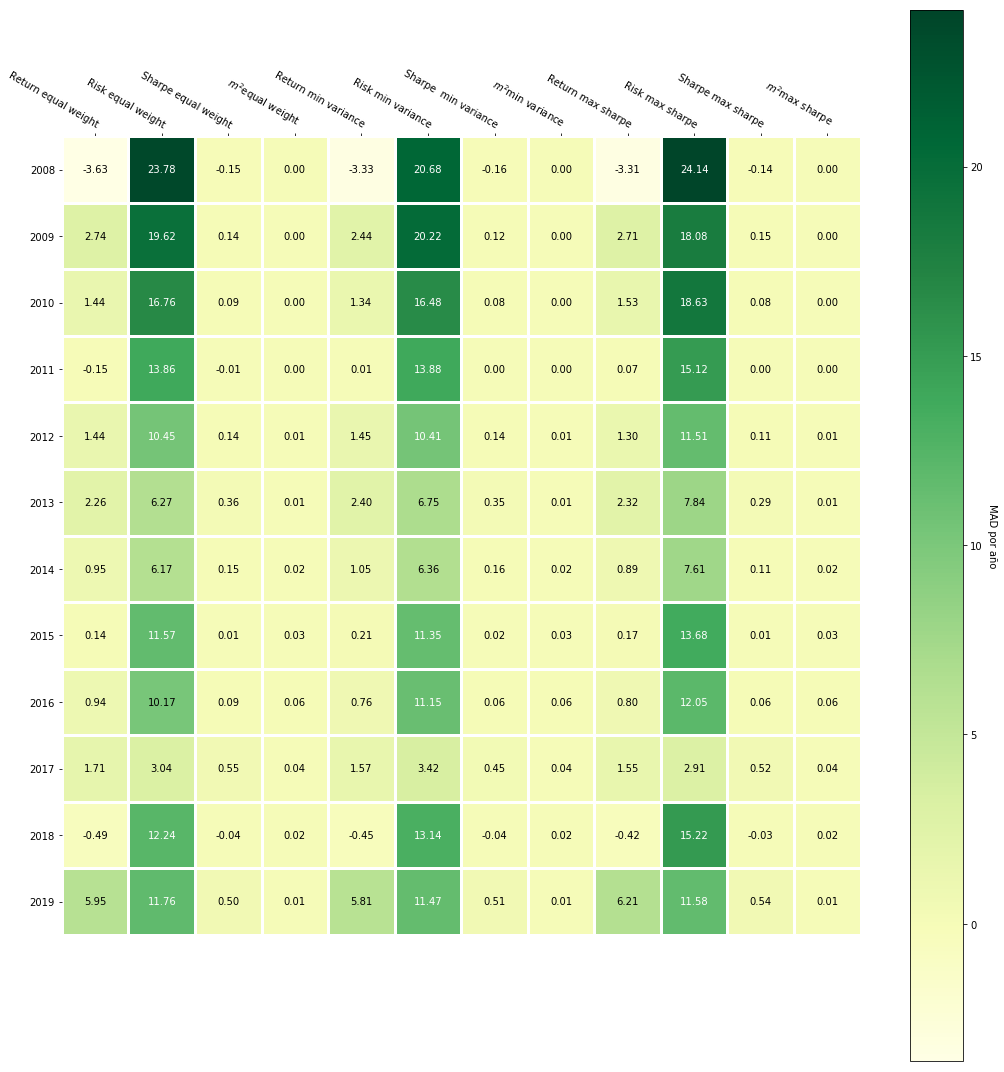

In [84]:
fig, ax = plt.subplots(figsize=(15,15))

im, cbar = heatmap(datas, years, MAD, ax=ax,
                   cmap="YlGn", cbarlabel="MAD por año")
texts = annotate_heatmap(im)

fig.tight_layout()
plt.show()

# Criterion #2:
## IRR (Internal Rate of Return)

> <p style='text-align: justify;'>  The internal rate of return (IRR) is a metric used in capital budgeting to estimate the profitability of potential investments. The internal rate of return is a discount rate that makes the net present value (NPV) of all cash flows from a particular project equal to zero.

<img style="float: center" src="https://github.com/Dianachav/bebe/blob/master/IRR.png?raw=true" width="300px" height="300px" />



> <p style='text-align: justify;'> The higher a project's internal rate of return, the more desirable it is to undertake. IRR is uniform for investments of varying types and, as such, IRR can be used to rank multiple prospective projects on a relatively even basis. Assuming the costs of investment are equal among the various projects, the project with the highest IRR would probably be considered the best and be undertaken first.

> <p style='text-align: justify;'> IRR is useful for corporations in evaluating stock buyback programs. Clearly, if a company allocates a substantial amount to a stock buyback, the analysis must show that the company's own stock is a better investment (has a higher IRR) than any other use of the funds for other capital projects.

## Methodology of portfolios

> <p style='text-align: justify;'> We are going to use three methods to create portfolios an then obtain the IRR in each of them:
> <p style='text-align: justify;'>  1. Equal Weights in the Portfolio
> <p style='text-align: justify;'> 2. Weights in the Portfolio using Markowitz's Minimun Variance
> <p style='text-align: justify;'> 3. Weights in the Portfolio using Markowitz's Maximun Sharpe

___
### Fist Analysis:
### Equal Weights in the Portfolio

#### STEP #1:
> <p  style='text-align: justify;'> 
Get the last NAV per year of each ETF in the sample that has been trading since 2008.

In [ ]:
# Function to get the last nav per year of each ETF

def ETF_nav(j):
    date=[]
    
    ETF_n = pd.read_csv(listas[j]) #Read files
    ETF_n = ETF_n.drop(columns = ['Index Level', 'Ex-Dividends', 'Shares Outstanding']) #Delete unnecessary columns
    for i in range(len(ETF_n["As Of"])): 
            date.append(ETF_n["As Of"].iloc[i].replace("-"," ")) #Date Format
    table_n=pd.DataFrame(columns=['Cash Flow' ])
    table_n['As Of'] = date
    table_n['Cash Flow'] = ETF_n['NAV per Share']
    table_n['As Of'] = pd.to_datetime(table_n['As Of'], format='%d %b %y')
    nav_t = table_n.groupby(table_n['As Of'].dt.year)['Cash Flow'].agg('first') #Group by the last NAV per year
    return(nav_t)

In [ ]:
# Call the function ETF_nav that get the last NAV per year of each ETF

n0 = ETF_nav(0) 
n1 = ETF_nav(1) 
n2 = ETF_nav(2) 
n3 = ETF_nav(3) 
n4 = ETF_nav(4) 
n5 = ETF_nav(5) 
n6 = ETF_nav(6) 
n7 = ETF_nav(7) 
n8 = ETF_nav(8) 
n9 = ETF_nav(9) 
n10 = ETF_nav(10) 
n11 = ETF_nav(11) 
n12 = ETF_nav(12) 
n13 = ETF_nav(13) 
n14 = ETF_nav(14) 
n15 = ETF_nav(15) 
n16 = ETF_nav(16) 
n17 = ETF_nav(17) 
n18 = ETF_nav(18) 
n19 = ETF_nav(19) 
n20 = ETF_nav(20) 
n21 = ETF_nav(21) 
n22 = ETF_nav(22) 
n23 = ETF_nav(23) 
n24 = ETF_nav(24) 
n25 = ETF_nav(25) 
n26 = ETF_nav(26) 
n27 = ETF_nav(27) 
n28 = ETF_nav(28) 
n29 = ETF_nav(29) 
n30 = ETF_nav(30) 
n31 = ETF_nav(31) 


# Construction of a DATAFRAME with the last NAV per year of each ETF

na = pd.DataFrame({'Core SP 500': n0,'Core SP Mid Cap': n1,
                  'Core SP Total US Stock Market': n2,'Expanded Tech Sector': n3,
                  'Expanded Tech Software Sector': n4,'MSCI ACWI': n5,
                  'MSCI EAFE': n6,'MSCI Emerging Markets': n7, 'MSCI Japan': n8,
                  'MSCI USA ESG Select': n9, 'Nasdaq Biotechnology': n10,
                  'NorthAmerican Tech Multimedia Networking': n11,
                  'PHLX Semiconductor': n12, 'Preferred and Income Securities': n13,
                  'Russell 1000': n14, 'Russell 1000 Growth': n15,
                  'Russell 1000 Value': n16, 'Russell 2000': n17,
                  'SP 500 Growth': n18,'US Basic Materials': n19,
                  'US Consumer Services': n20, 'SP 500 Value': n21, 'US Energy': n22,
                  'US Financial Services': n23, 'US Financials': n24, 'US Healthcare': n25,
                  'Home Construction': n26, 'US Industrials': n27, 'US Medical Devices': n28,
                  'US Pharmaceuticals': n29, 'US Technology': n30,'US Telecommunications': n31})
    
    

pd.set_option('display.max_columns', 32) #Show all the columns in the DataFrame
na = na[12:23] #Selection from the year 2008 onwards

#### STEP #2:
> <p  style='text-align: justify;'> 
Get the Equal Weight in the Portfolio

In [ ]:
#Equal Weights in the Portfolio

inv = 100000 #Investment: 100k USD
pt = 1 #Total Weight of a portfolio: 100%
n_ind = len(na.loc[2008]) #Number of industries
ew = pt/n_ind #Equal Weighted
ipw_ew = ew*inv #Investment per weight
navs08 = na.loc[2008] #Net Asset Value (NAV) in 2008

In [ ]:
# Shares per ETF in 2008 with Equal Weights

tew_etf = ipw_ew/navs08
tew_etf = round(tew_etf)

#### STEP #3:
> <p  style='text-align: justify;'> 
Get the Net Asset Value (NAV) per year of each ETF

In [ ]:
#NAV per ETF with the same number of shares than in 2008

nav_ew = tew_etf*na

In [ ]:
a0 = nav_ew["Core SP 500"]
a1 = nav_ew["Core SP Mid Cap"]
a2 = nav_ew["Core SP Total US Stock Market"]
a3 = nav_ew["Expanded Tech Sector"]
a4 = nav_ew["Expanded Tech Software Sector"]
a5 = nav_ew["MSCI ACWI"]
a6 = nav_ew["MSCI EAFE"]
a7 = nav_ew["MSCI Emerging Markets"]
a8 = nav_ew["MSCI Japan"]
a9 = nav_ew["MSCI USA ESG Select"]
a10 = nav_ew["Nasdaq Biotechnology"]
a11 = nav_ew["NorthAmerican Tech Multimedia Networking"]
a12 = nav_ew["PHLX Semiconductor"]
a13 = nav_ew["Preferred and Income Securities"]
a14 = nav_ew["Russell 1000"]
a15 = nav_ew["Russell 1000 Growth"]
a16 = nav_ew["Russell 1000 Value"]
a17 = nav_ew["Russell 2000"]
a18 = nav_ew["SP 500 Growth"]
a19 = nav_ew["US Basic Materials"]
a20 = nav_ew["US Consumer Services"]
a21 = nav_ew["SP 500 Value"]
a22 = nav_ew["US Energy"]
a23 = nav_ew["US Financial Services"]
a24 = nav_ew["US Financials"]
a25 = nav_ew["US Healthcare"]
a26 = nav_ew["Home Construction"]
a27 = nav_ew["US Industrials"]
a28 = nav_ew["US Medical Devices"]
a29 = nav_ew["US Pharmaceuticals"]
a30 = nav_ew["US Technology"]
a31 = nav_ew["US Telecommunications"]


#### STEP #4:
> <p  style='text-align: justify;'> 
Once we have the NAV per ETF, we need to group the NAV by industries. 

In [ ]:
#Group ETF's by Industries

Chemical_Materials = a19+a16
Consumer_Retail = a20+a5+a21
Electronics =  a1+a14+a17
Energy = a22+a7+a18
Environmental = a0+a6
Financial_Services = a13+a23+a24
Hardware_Systems =  a2+a8
HealthCare_Biotech =  a10+a25+a28+a29
Industrial =  a26+a27
Information_Technology = a3+a30
Manufacturing = a12+a15
Media_Communications = a11+a31
Software_Services = a4+a9

In [ ]:
#NAV's DataFrame by industries

ni_ew = pd.DataFrame({'Chemical/Materials': Chemical_Materials,
                   'Consumer/Retail': Consumer_Retail,
                   'Electronics': Electronics,
                   'Energy': Energy,
                   'Environmental': Environmental,
                   'Financial Services' : Financial_Services,
                   'Hardware/Systems': Hardware_Systems,
                   'HealthCare/Biotech': HealthCare_Biotech,
                   'Industrial': Industrial,
                   'Information Technology': Information_Technology,
                   'Manufacturing': Manufacturing,
                   'Media/Communications': Media_Communications,
                   'Software/Services': Software_Services})


#### STEP #5:
> <p  style='text-align: justify;'> 
Get the Net Present Value (NPV) per year of each industry

In [ ]:
#List of industries

lis_ind = ['Chemical/Materials', 'Consumer/Retail','Electronics', 'Energy','Environmental',
            'Financial Services' , 'Hardware/Systems', 'HealthCare/Biotech', 'Industrial',
            'Information Technology', 'Manufacturing','Media/Communications','Software/Services']

In [ ]:
#List of years that we'll use to get the Net Present Value (NPV)

t_tir= []
for i in range(0,12):
    t_tir.append(1+i)
t_tir.reverse()

In [ ]:
#List of discount rate 2008-2019

r = [0.005, 0.0073, 0.0075, 0.0075, 0.0075, 0.0075, 0.0077, 0.0102, 0.0138, .0225, 0.03]

In [ ]:
#Bottom part of the Net Present Values's (NPV) formula

d_npv =[]
for i in range(len(r)):
    bottom = (1+r[i])**(t_tir[i]) #(1+r)^t
    d_npv.append(bottom)

In [ ]:
#Formula of the Net Present Values (NPV)

t_npv_ew =[]
for i in range(len(lis_ind)):
    f_npv_ew = ni_ew[lis_ind[i]]/(d_npv) #Ct/(1+r^t)
    t_npv_ew.append(f_npv_ew)

In [ ]:
#Initial investment per industry

in_in_ew = [-2*ipw_ew, -3*ipw_ew, -3*ipw_ew, -3*ipw_ew, -2*ipw_ew, -3*ipw_ew, -2*ipw_ew, -4*ipw_ew, -2*ipw_ew, -2*ipw_ew, -2*ipw_ew, -2*ipw_ew, -2*ipw_ew]

In [ ]:
#NPV's DataFrame by industries

npv_ew = pd.DataFrame(t_npv_ew).T
npv_ew.loc[2007] = in_in_ew
npv_ew = npv_ew.sort_index() 


#### STEP #6:
> <p  style='text-align: justify;'> 
Get the Internal Rate of Return (IRR) per year of each industry

In [ ]:
#npv_ew's column list per industry

lis_i = [npv_ew['Chemical/Materials'], npv_ew['Consumer/Retail'], npv_ew['Electronics'], npv_ew['Energy'], npv_ew['Environmental'],
         npv_ew['Financial Services'] , npv_ew['Hardware/Systems'], npv_ew['HealthCare/Biotech'], npv_ew['Industrial'],
         npv_ew['Information Technology'], npv_ew['Manufacturing'], npv_ew['Media/Communications'], npv_ew['Software/Services']]

In [ ]:
#Convertion of each column to an array

lis_irr = [np.array(i) for i in lis_i]

In [ ]:
#IRR's formula using "np.irr"

t_t = []
for i in range(len(lis_irr)):
    t_a = []
    for j in range(2,13):
        tir = np.irr(lis_irr[i][:j])*100
        t_a.append(tir)
    t_t.append(t_a)

In [ ]:
#List of year we'll use in the IRR's DataFrame

y_tir = []
for i in range(2008,2019):
    y_tir.append(1+i)

In [ ]:
#IRR's DataFrame by industries

irr_df = pd.DataFrame(columns = lis_ind)
irr_df['Chemical/Materials'] = (t_t)[0]
irr_df['Consumer/Retail'] = (t_t)[1]
irr_df['Electronics'] = (t_t)[2]
irr_df['Energy'] = (t_t)[3]
irr_df['Environmental'] = (t_t)[4]
irr_df['Financial Services'] = (t_t)[5]
irr_df['Hardware/Systems'] = (t_t)[6]
irr_df['HealthCare/Biotech'] = (t_t)[7]
irr_df['Industrial'] = (t_t)[8]
irr_df['Information Technology'] = (t_t)[9]
irr_df['Manufacturing'] = (t_t)[10]
irr_df['Media/Communications'] = (t_t)[11]
irr_df['Software/Services'] = (t_t)[12]
irr_df['Year'] = y_tir
irr_df.set_index('Year')

___
### Second Analysis:
### Weights in the Portfolio using Markowitz's Minimun Variance 

#### STEP #1:
> <p  style='text-align: justify;'> 
Get the last NAV per year of each ETF in the sample that has been trading since 2008.

#### STEP #2:
> <p  style='text-align: justify;'> 
Get the Weights in the Portfolio using Markowitz's Minimun Variance 

In [ ]:
#Weights in the Portfolio using Markowitz's Minimun Variance

#inv = 100000 #Investment: 100k USD

#Weights in the Portfolio per ETF
mv = min_variance_port.drop(columns = ['Returns', 'Volatility', 'Sharpe Ratio'])
mv['Year'] = 2008
mv = mv.set_index('Year')

ipw_mv = mv.loc[2008]*inv #Investment per weight
navs08 = na.loc[2008] #Net Asset Value (NAV) in 2008

In [ ]:
# Shares per ETF in 2008

tmv_etf = ipw_mv/navs08
tmv_etf = round(tmv_etf)

#### STEP #3:
> <p  style='text-align: justify;'> 
Get the Net Asset Value (NAV) per year of each ETF

In [ ]:
#NAV per ETF with the same number of shares than in 2008

nav_mv = tmv_etf*na

In [ ]:
mva0 = nav_mv["Core SP 500"]
mva1 = nav_mv["Core SP Mid Cap"]
mva2 = nav_mv["Core SP Total US Stock Market"]
mva3 = nav_mv["Expanded Tech Sector"]
mva4 = nav_mv["Expanded Tech Software Sector"]
mva5 = nav_mv["MSCI ACWI"]
mva6 = nav_mv["MSCI EAFE"]
mva7 = nav_mv["MSCI Emerging Markets"]
mva8 = nav_mv["MSCI Japan"]
mva9 = nav_mv["MSCI USA ESG Select"]
mva10 = nav_mv["Nasdaq Biotechnology"]
mva11 = nav_mv["NorthAmerican Tech Multimedia Networking"]
mva12 = nav_mv["PHLX Semiconductor"]
mva13 = nav_mv["Preferred and Income Securities"]
mva14 = nav_mv["Russell 1000"]
mva15 = nav_mv["Russell 1000 Growth"]
mva16 = nav_mv["Russell 1000 Value"]
mva17 = nav_mv["Russell 2000"]
mva18 = nav_mv["SP 500 Growth"]
mva19 = nav_mv["US Basic Materials"]
mva20 = nav_mv["US Consumer Services"]
mva21 = nav_mv["SP 500 Value"]
mva22 = nav_mv["US Energy"]
mva23 = nav_mv["US Financial Services"]
mva24 = nav_mv["US Financials"]
mva25 = nav_mv["US Healthcare"]
mva26 = nav_mv["Home Construction"]
mva27 = nav_mv["US Industrials"]
mva28 = nav_mv["US Medical Devices"]
mva29 = nav_mv["US Pharmaceuticals"]
mva30 = nav_mv["US Technology"]
mva31 = nav_mv["US Telecommunications"]


#### STEP #4:
> <p  style='text-align: justify;'> 
Once we have the NAV per ETF, we need to group the NAV by industries. 

In [ ]:
#Group ETF's by Industries

Chemical_Materials = mva19+mva16
Consumer_Retail = mva20+mva5+mva21
Electronics =  mva1+mva14+mva17
Energy = mva22+mva7+mva18
Environmental = mva0+mva6
Financial_Services = mva13+mva23+mva24
Hardware_Systems = mva2+mva8
HealthCare_Biotech = mva10+mva25+mva28+mva29
Industrial = mva26+mva27
Information_Technology = mva3+mva30
Manufacturing = mva12+mva15
Media_Communications = mva11+mva31
Software_Services = mva4+mva9

In [ ]:
#NAV's DataFrame by industries

ni_mv = pd.DataFrame({'Chemical/Materials': Chemical_Materials,
                   'Consumer/Retail': Consumer_Retail,
                   'Electronics': Electronics,
                   'Energy': Energy,
                   'Environmental': Environmental,
                   'Financial Services' : Financial_Services,
                   'Hardware/Systems': Hardware_Systems,
                   'HealthCare/Biotech': HealthCare_Biotech,
                   'Industrial': Industrial,
                   'Information Technology': Information_Technology,
                   'Manufacturing': Manufacturing,
                   'Media/Communications': Media_Communications,
                   'Software/Services': Software_Services})


#### STEP #5:
> <p  style='text-align: justify;'> 
Get the Net Present Value (NPV) per year of each industry

In [ ]:
#Formula of the Net Present Values (NPV)

t_npv_mv =[]
for i in range(len(lis_ind)):
    f_npv = ni_mv[lis_ind[i]]/(d_npv) #Ct/(1+r^t)
    t_npv_mv.append(f_npv)

In [ ]:
#Initial investment per industry

wmva0 = -ipw_mv["Core SP 500"]
wmva1 = -ipw_mv["Core SP Mid Cap"]
wmva2 = -ipw_mv["Core SP Total US Stock Market"]
wmva3 = -ipw_mv["Expanded Tech Sector"]
wmva4 = -ipw_mv["Expanded Tech Software Sector"]
wmva5 = -ipw_mv["MSCI ACWI"]
wmva6 = -ipw_mv["MSCI EAFE"]
wmva7 = -ipw_mv["MSCI Emerging Markets"]
wmva8 = -ipw_mv["MSCI Japan"]
wmva9 = -ipw_mv["MSCI USA ESG Select"]
wmva10 = -ipw_mv["Nasdaq Biotechnology"]
wmva11 = -ipw_mv["NorthAmerican Tech Multimedia Networking"]
wmva12 = -ipw_mv["PHLX Semiconductor"]
wmva13 = -ipw_mv["Preferred and Income Securities"]
wmva14 = -ipw_mv["Russell 1000"]
wmva15 = -ipw_mv["Russell 1000 Growth"]
wmva16 = -ipw_mv["Russell 1000 Value"]
wmva17 = -ipw_mv["Russell 2000"]
wmva18 = -ipw_mv["SP 500 Growth"]
wmva19 = -ipw_mv["US Basic Materials"]
wmva20 = -ipw_mv["US Consumer Services"]
wmva21 = -ipw_mv["SP 500 Value"]
wmva22 = -ipw_mv["US Energy"]
wmva23 = -ipw_mv["US Financial Services"]
wmva24 = -ipw_mv["US Financials"]
wmva25 = -ipw_mv["US Healthcare"]
wmva26 = -ipw_mv["Home Construction"]
wmva27 = -ipw_mv["US Industrials"]
wmva28 = -ipw_mv["US Medical Devices"]
wmva29 = -ipw_mv["US Pharmaceuticals"]
wmva30 = -ipw_mv["US Technology"]
wmva31 = -ipw_mv["US Telecommunications"]

In [ ]:
#Group ETF's by Industries

Chemical_Materials = wmva19+wmva16
Consumer_Retail = wmva20+wmva5+wmva21
Electronics =  wmva1+wmva14+wmva17
Energy = wmva22+wmva7+wmva18
Environmental = wmva0+wmva6
Financial_Services = wmva13+wmva23+wmva24
Hardware_Systems = wmva2+wmva8
HealthCare_Biotech = wmva10+wmva25+wmva28+wmva29
Industrial = wmva26+wmva27
Information_Technology = wmva3+wmva30
Manufacturing = wmva12+wmva15
Media_Communications = wmva11+wmva31
Software_Services = wmva4+wmva9

In [ ]:
#Initial investment per industry

in_in_mv = [Chemical_Materials, Consumer_Retail, Electronics, Energy, Environmental,
            Financial_Services , Hardware_Systems, HealthCare_Biotech, Industrial,
            Information_Technology, Manufacturing, Media_Communications, Software_Services]

In [ ]:
#NPV's DataFrame by industries

npv_mv = pd.DataFrame(t_npv_mv).T
npv_mv.loc[2007] = in_in_mv
npv_mv = npv_mv.sort_index() 


#### STEP #6:
> <p  style='text-align: justify;'> 
Get the Internal Rate of Return (IRR) per year of each industry

In [ ]:
#npv_mv's column list per industry

lis_i = [npv_mv['Chemical/Materials'], npv_mv['Consumer/Retail'], npv_mv['Electronics'], npv_mv['Energy'], npv_mv['Environmental'],
         npv_mv['Financial Services'] , npv_mv['Hardware/Systems'], npv_mv['HealthCare/Biotech'], npv_mv['Industrial'],
         npv_mv['Information Technology'], npv_mv['Manufacturing'], npv_mv['Media/Communications'], npv_mv['Software/Services']]

In [ ]:
#Convertion of each column to an array

lis_irr = [np.array(i) for i in lis_i]

In [ ]:
#IRR's formula using "np.irr"

t_t_mv = []
for i in range(len(lis_irr)):
    t_a = []
    for j in range(2,13):
        tir = np.irr(lis_irr[i][:j])*100
        t_a.append(tir)
    t_t_mv.append(t_a)

In [ ]:
#List of year we'll use in the IRR's DataFrame

y_tir = []
for i in range(2008,2019):
    y_tir.append(1+i)

In [ ]:
#IRR's DataFrame by industries

irr_df = pd.DataFrame(columns = lis_ind)
irr_df['Chemical/Materials'] = (t_t_mv)[0]
irr_df['Consumer/Retail'] = (t_t_mv)[1]
irr_df['Electronics'] = (t_t_mv)[2]
irr_df['Energy'] = (t_t_mv)[3]
irr_df['Environmental'] = (t_t_mv)[4]
irr_df['Financial Services'] = (t_t_mv)[5]
irr_df['Hardware/Systems'] = (t_t_mv)[6]
irr_df['HealthCare/Biotech'] = (t_t_mv)[7]
irr_df['Industrial'] = (t_t_mv)[8]
irr_df['Information Technology'] = (t_t_mv)[9]
irr_df['Manufacturing'] = (t_t_mv)[10]
irr_df['Media/Communications'] = (t_t_mv)[11]
irr_df['Software/Services'] = (t_t_mv)[12]
irr_df['Year'] = y_tir
irr_df.set_index('Year')

___
### Third Analysis:
### Weights in the Portfolio using Markowitz's Maximum Sharpe 

#### STEP #1:
> <p  style='text-align: justify;'> 
Get the last NAV per year of each ETF in the sample that has been trading since 2008.

#### STEP #2:
> <p  style='text-align: justify;'> 
Get the Weights in the Portfolio using Markowitz's Maximum Sharpe

In [ ]:
#Weights in the Portfolio using Markowitz's Maximum Sharpe

#inv = 100000 #Investment: 100k USD

#Weights in the Portfolio per ETF
ms = sharpe_portfolio.drop(columns = ['Returns', 'Volatility', 'Sharpe Ratio'])
ms['Year'] = 2008
ms = ms.set_index('Year')

ipw_ms = ms.loc[2008]*inv #Investment per weight
navs08 = na.loc[2008] #Net Asset Value (NAV) in 2008

In [ ]:
# Shares per ETF in 2008

tms_etf = ipw_ms/navs08
tms_etf = round(tms_etf)

#### STEP #3:
> <p  style='text-align: justify;'> 
Get the Net Asset Value (NAV) per year of each ETF

In [ ]:
#NAV per ETF with the same number of shares than in 2008

nav_ms = tms_etf*na

In [ ]:
msa0 = nav_ms["Core SP 500"]
msa1 = nav_ms["Core SP Mid Cap"]
msa2 = nav_ms["Core SP Total US Stock Market"]
msa3 = nav_ms["Expanded Tech Sector"]
msa4 = nav_ms["Expanded Tech Software Sector"]
msa5 = nav_ms["MSCI ACWI"]
msa6 = nav_ms["MSCI EAFE"]
msa7 = nav_ms["MSCI Emerging Markets"]
msa8 = nav_ms["MSCI Japan"]
msa9 = nav_ms["MSCI USA ESG Select"]
msa10 = nav_ms["Nasdaq Biotechnology"]
msa11 = nav_ms["NorthAmerican Tech Multimedia Networking"]
msa12 = nav_ms["PHLX Semiconductor"]
msa13 = nav_ms["Preferred and Income Securities"]
msa14 = nav_ms["Russell 1000"]
msa15 = nav_ms["Russell 1000 Growth"]
msa16 = nav_ms["Russell 1000 Value"]
msa17 = nav_ms["Russell 2000"]
msa18 = nav_ms["SP 500 Growth"]
msa19 = nav_ms["US Basic Materials"]
msa20 = nav_ms["US Consumer Services"]
msa21 = nav_ms["SP 500 Value"]
msa22 = nav_ms["US Energy"]
msa23 = nav_ms["US Financial Services"]
msa24 = nav_ms["US Financials"]
msa25 = nav_ms["US Healthcare"]
msa26 = nav_ms["Home Construction"]
msa27 = nav_ms["US Industrials"]
msa28 = nav_ms["US Medical Devices"]
msa29 = nav_ms["US Pharmaceuticals"]
msa30 = nav_ms["US Technology"]
msa31 = nav_ms["US Telecommunications"]


#### STEP #4:
> <p  style='text-align: justify;'> 
Once we have the NAV per ETF, we need to group the NAV by industries. 

In [ ]:
#Group ETF's by Industries

Chemical_Materials = msa19+msa16
Consumer_Retail = msa20+msa5+msa21
Electronics =  msa1+msa14+msa17
Energy = msa22+msa7+msa18
Environmental = msa0+msa6
Financial_Services = msa13+msa23+msa24
Hardware_Systems = msa2+msa8
HealthCare_Biotech = msa10+msa25+msa28+msa29
Industrial = msa26+msa27
Information_Technology = msa3+msa30
Manufacturing = msa12+msa15
Media_Communications = msa11+msa31
Software_Services = msa4+msa9

In [ ]:
#NAV's DataFrame by industries

ni_ms = pd.DataFrame({'Chemical/Materials': Chemical_Materials,
                   'Consumer/Retail': Consumer_Retail,
                   'Electronics': Electronics,
                   'Energy': Energy,
                   'Environmental': Environmental,
                   'Financial Services' : Financial_Services,
                   'Hardware/Systems': Hardware_Systems,
                   'HealthCare/Biotech': HealthCare_Biotech,
                   'Industrial': Industrial,
                   'Information Technology': Information_Technology,
                   'Manufacturing': Manufacturing,
                   'Media/Communications': Media_Communications,
                   'Software/Services': Software_Services})


#### STEP #5:
> <p  style='text-align: justify;'> 
Get the Net Present Value (NPV) per year of each industry

In [ ]:
#Formula of the Net Present Values (NPV)

t_npv_ms =[]
for i in range(len(lis_ind)):
    f_npv = ni_ms[lis_ind[i]]/(d_npv) #Ct/(1+r^t)
    t_npv_ms.append(f_npv)

In [ ]:
#Initial investment per industry

wmsa0 = -ipw_ms["Core SP 500"]
wmsa1 = -ipw_ms["Core SP Mid Cap"]
wmsa2 = -ipw_ms["Core SP Total US Stock Market"]
wmsa3 = -ipw_ms["Expanded Tech Sector"]
wmsa4 = -ipw_ms["Expanded Tech Software Sector"]
wmsa5 = -ipw_ms["MSCI ACWI"]
wmsa6 = -ipw_ms["MSCI EAFE"]
wmsa7 = -ipw_ms["MSCI Emerging Markets"]
wmsa8 = -ipw_ms["MSCI Japan"]
wmsa9 = -ipw_ms["MSCI USA ESG Select"]
wmsa10 = -ipw_ms["Nasdaq Biotechnology"]
wmsa11 = -ipw_ms["NorthAmerican Tech Multimedia Networking"]
wmsa12 = -ipw_ms["PHLX Semiconductor"]
wmsa13 = -ipw_ms["Preferred and Income Securities"]
wmsa14 = -ipw_ms["Russell 1000"]
wmsa15 = -ipw_ms["Russell 1000 Growth"]
wmsa16 = -ipw_ms["Russell 1000 Value"]
wmsa17 = -ipw_ms["Russell 2000"]
wmsa18 = -ipw_ms["SP 500 Growth"]
wmsa19 = -ipw_ms["US Basic Materials"]
wmsa20 = -ipw_ms["US Consumer Services"]
wmsa21 = -ipw_ms["SP 500 Value"]
wmsa22 = -ipw_ms["US Energy"]
wmsa23 = -ipw_ms["US Financial Services"]
wmsa24 = -ipw_ms["US Financials"]
wmsa25 = -ipw_ms["US Healthcare"]
wmsa26 = -ipw_ms["Home Construction"]
wmsa27 = -ipw_ms["US Industrials"]
wmsa28 = -ipw_ms["US Medical Devices"]
wmsa29 = -ipw_ms["US Pharmaceuticals"]
wmsa30 = -ipw_ms["US Technology"]
wmsa31 = -ipw_ms["US Telecommunications"]

In [ ]:
#Group ETF's by Industries

Chemical_Materials = wmsa19+wmsa16
Consumer_Retail = wmsa20+wmsa5+wmsa21
Electronics =  wmsa1+wmsa14+wmsa17
Energy = wmsa22+wmsa7+wmsa18
Environmental = wmsa0+wmsa6
Financial_Services = wmsa13+wmsa23+wmsa24
Hardware_Systems = wmsa2+wmsa8
HealthCare_Biotech = wmsa10+wmsa25+wmsa28+wmsa29
Industrial = wmsa26+wmsa27
Information_Technology = wmsa3+wmsa30
Manufacturing = wmsa12+wmsa15
Media_Communications = wmsa11+wmsa31
Software_Services = wmsa4+wmsa9

In [ ]:
#Initial investment per industry

in_in_ms = [Chemical_Materials, Consumer_Retail, Electronics, Energy, Environmental,
            Financial_Services , Hardware_Systems, HealthCare_Biotech, Industrial,
            Information_Technology, Manufacturing, Media_Communications, Software_Services]

In [ ]:
#NPV's DataFrame by industries

npv_ms = pd.DataFrame(t_npv_ms).T
npv_ms.loc[2007] = in_in_ms
npv_ms = npv_ms.sort_index() 


#### STEP #6:
> <p  style='text-align: justify;'> 
Get the Internal Rate of Return (IRR) per year of each industry

In [ ]:
#npv_ms's column list per industry

lis_i = [npv_ms['Chemical/Materials'], npv_ms['Consumer/Retail'], npv_ms['Electronics'], npv_ms['Energy'], npv_ms['Environmental'],
         npv_ms['Financial Services'] , npv_ms['Hardware/Systems'], npv_ms['HealthCare/Biotech'], npv_ms['Industrial'],
         npv_ms['Information Technology'], npv_ms['Manufacturing'], npv_ms['Media/Communications'], npv_ms['Software/Services']]

In [ ]:
#Convertion of each column to an array

lis_irr = [np.array(i) for i in lis_i]

In [ ]:
#IRR's formula using "np.irr"

t_t_ms = []
for i in range(len(lis_irr)):
    t_a = []
    for j in range(2,13):
        tir = np.irr(lis_irr[i][:j])*100
        t_a.append(tir)
    t_t_ms.append(t_a)

In [ ]:
#List of year we'll use in the IRR's DataFrame

y_tir = []
for i in range(2008,2019):
    y_tir.append(1+i)

In [ ]:
#IRR's DataFrame by industries

irr_df = pd.DataFrame(columns = lis_ind)
irr_df['Chemical/Materials'] = (t_t_ms)[0]
irr_df['Consumer/Retail'] = (t_t_ms)[1]
irr_df['Electronics'] = (t_t_ms)[2]
irr_df['Energy'] = (t_t_ms)[3]
irr_df['Environmental'] = (t_t_ms)[4]
irr_df['Financial Services'] = (t_t_ms)[5]
irr_df['Hardware/Systems'] = (t_t_ms)[6]
irr_df['HealthCare/Biotech'] = (t_t_ms)[7]
irr_df['Industrial'] = (t_t_ms)[8]
irr_df['Information Technology'] = (t_t_ms)[9]
irr_df['Manufacturing'] = (t_t_ms)[10]
irr_df['Media/Communications'] = (t_t_ms)[11]
irr_df['Software/Services'] = (t_t_ms)[12]
irr_df['Year'] = y_tir
irr_df.set_index('Year')

In [ ]:
#CASH FLOW TOTALES POR AÑO DE CADA ETF
cf = []
for i in range(2000,2020):
    kk = na.loc[i].sum()
    cf.append(kk)

In [ ]:
y_etf = []
for i in range(1999,2019):
    y_etf.append(1+i)

In [ ]:
#ESTO ES LA SUMA TOTAL DE LOS CASHFLOW POR AÑO

n_etfs = pd.DataFrame(columns=['Cash Flow'])
n_etfs['Año'] = y_etf
n_etfs.set_index('Año', inplace=True)
n_etfs['Cash Flow'] = cf
n_etfs = n_etfs[4:24]
n_etfs

In [ ]:
t_tir= []
for i in range(0,20):
    t_tir.append(1+i)
t_tir.reverse()

In [ ]:
d = [5.73, 3.41, 1.17, 2.10, 2.40, 4.25, 6.02, 5.79, 2.17, 0.50, 0.73, 0.75, 0.75, 0.75,
    0.75, 0.77, 1.02, 1.38, 2.25, 3.00]

In [ ]:
d_vp =[]
for i in range(20):
    cosa = (1-d[i])**(t_tir[i])
    d_vp.append(cosa)

In [ ]:
tir=[]
for i in range(20):
    ope= sum(cf[i]/d_vp)
    tir.append(ope)

In [ ]:
num = ['16','22','25','27','28','29','30','31','32','32','32','35','38','39','39','39','39','39','40','40']
n_etf = pd.DataFrame(columns=['ETFs por año', 'TIR'])
n_etf['Año'] = y_etf
n_etf.set_index('Año',inplace=True)
n_etf['ETFs por año'] = num
n_etf['TIR'] = tir
n_etf